# How are in-demand skills trending for Data Analysts?

## Methodology

1. Aggregate skill counts monthly.
2. Re-analyze based on percentage of total jobs.
3. Plot the monthly skill demand.

In [1]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy() #filtering US Data Analyst roles
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

df_exploded = df_DA_US.explode('job_skills') #exploding the job skills column will match each skill to its corresponding job title

df_pivot = df_exploded.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0) #creating a pivot table with months as rows and job skills as columns
df_pivot.loc['Total'] = df_pivot.sum() #creating a row of Total Skills for the entire year in order to be able to sort by skill counts
df_pivot = df_pivot[df_pivot.loc['Total'].sort_values(ascending=False).index] #sorting Total row, therefore sorting skill counts
df_pivot = df_pivot.drop('Total') #remove total row since it's now unecessary




In [7]:
DA_totals = df_DA_US.groupby('job_posted_month_no').size() #now we'll create a df holding the total number of postings per month 

df_percent = df_pivot.div(DA_totals/100, axis=0) #this will divide the job skill by total number of job postings to get percentage 

df_percent = df_percent.reset_index()
df_percent['job_posted_month'] = df_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b')) 
df_percent = df_percent.set_index('job_posted_month')
df_percent = df_percent.drop(columns='job_posted_month_no')
df_percent #going from having the month numbers as the index to the month names as the index

job_skills,sql,excel,tableau,python,sas,r,power bi,word,powerpoint,oracle,...,google chat,openstack,theano,asp.net core,qt,couchdb,capacitor,codecommit,chainer,msaccess
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166,17.812574,15.740523,11.396280,11.443372,8.453026,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011773,0.011773,0.000000,0.000000
Feb,51.730895,42.243632,27.367734,26.420640,19.790986,17.064010,18.321359,12.050947,11.512084,8.393207,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,51.881634,42.795111,29.012544,27.066581,19.909939,18.349952,16.950788,11.836603,10.759087,6.722419,...,0.016082,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,53.231939,42.139197,29.575136,27.756654,21.524219,17.159861,17.473963,11.489502,10.745578,7.257398,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.016532,0.000000,0.000000,0.000000,0.000000
May,51.692369,42.419387,28.680152,27.017825,19.467254,17.364310,17.224114,11.155618,10.314440,7.170038,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020028
Jun,50.360725,41.914482,28.646841,28.312511,17.314799,17.895478,17.402780,12.686961,10.980116,7.284885,...,0.000000,0.017596,0.000000,0.000000,0.017596,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,50.163430,40.722938,29.475101,27.648529,19.150163,16.939050,16.939050,11.286291,10.555662,7.710056,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Aug,51.462165,41.166717,29.409105,30.524570,19.234248,19.158879,18.209225,11.335544,11.245101,7.295749,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,49.471869,38.823022,29.165768,26.492779,18.452253,16.081052,17.676223,10.303945,10.239276,7.738737,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [27]:
df_top_5 = df_percent.iloc[:,:5] #choosing top 5 skills
df_top_5

job_skills,sql,excel,tableau,python,sas
job_posted_month,,,,,
Jan,54.167648,42.288674,29.291264,26.536379,21.568166
Feb,51.730895,42.243632,27.367734,26.420640,19.790986
Mar,51.881634,42.795111,29.012544,27.066581,19.909939
Apr,53.231939,42.139197,29.575136,27.756654,21.524219
May,51.692369,42.419387,28.680152,27.017825,19.467254
Jun,50.360725,41.914482,28.646841,28.312511,17.314799
Jul,50.163430,40.722938,29.475101,27.648529,19.150163
Aug,51.462165,41.166717,29.409105,30.524570,19.234248
Sep,49.471869,38.823022,29.165768,26.492779,18.452253


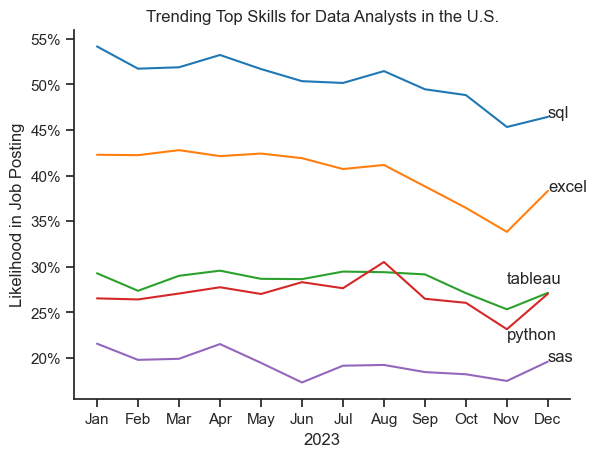

In [43]:
fig, ax =plt.subplots()
sns.set_theme(style='ticks')
sns.despine()
sns.lineplot(data=df_top_5, dashes=False, palette='tab10')
plt.xlabel('2023')
plt.ylabel('Likelihood in Job Posting')
plt.title('Trending Top Skills for Data Analysts in the U.S.')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.0f}%'))
for i in range(5):
    if i == 2: #created these two conditions because otherwise the text is superimposed for python and tableau and looks bad
        plt.text(x=10, y=df_top_5.iloc[-1, i] + 1, s=df_top_5.columns[i])
    elif i == 3:
        plt.text(x=10, y=df_top_5.iloc[-1, i] - 5, s=df_top_5.columns[i])
    else:
        plt.text(x=11, y=df_top_5.iloc[-1, i], s=df_top_5.columns[i])
plt.text
plt.legend().remove()
plt.show()